# Tasca M4 T01

## Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

bd = pd.read_csv('preu lloguer per trimestre i barri.csv')
df = pd.DataFrame(bd)

df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [5]:
df.shape #muestra cantidad de filas y columnas

(584, 8)

- Observamos un dataframe con 584 filas y 8 columnas que corresponden a los alquileres medios por año, trimestre, distrito, barrio y precio, etc.  

In [6]:
df.describe() #descripción estadística

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
len(df)

584

In [9]:
df.isna().sum() #muestra faltantes de datos
# Muchas veces puede ser que no existan datos NaN pero puede haber faltante de datos, al poner '--', como es el caso de este DataSet el Dtype resulta ser de tipo object.

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


- Sería conveniente que el Dtype de "Preu" sea numérico

In [11]:
df['Preu'][:30]

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
11        --
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
25    1294.9
26     990.1
27     959.0
28     745.4
29     859.1
Name: Preu, dtype: object

- Se puede observar que hay filas en los que la columna "Preu" en vez de un dato numérico tiene '--'(datos faltantes)

In [12]:
df['Preu'].value_counts()['--']

44

- Faltan 44 datos en la columna "Preu"

In [13]:
df1 = df.drop(df.loc[df['Preu']=='--'].index) # Se eliminaron los datos que tenían '--'

In [14]:
df1.shape[0] # comprobación de que la eliminación de datos fue efectiva.

540

In [15]:
df1['Preu'][:30] # ya no aparecen registros con '--'

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
25    1294.9
26     990.1
27     959.0
28     745.4
29     859.1
30     910.6
Name: Preu, dtype: object

In [16]:
df1['Preu'] = df1['Preu'].astype(float) #Cambio de tipo a la variable de objeto a float
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


In [17]:
a = df1['Nom_Districte'].value_counts()

a

Horta-Guinardó         80
Nou Barris             80
Sant Martí             80
Sants-Montjuïc         56
Sant Andreu            52
Eixample               48
Sarrià-Sant Gervasi    48
Gràcia                 40
Ciutat Vella           32
Les Corts              24
Name: Nom_Districte, dtype: int64

### Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)

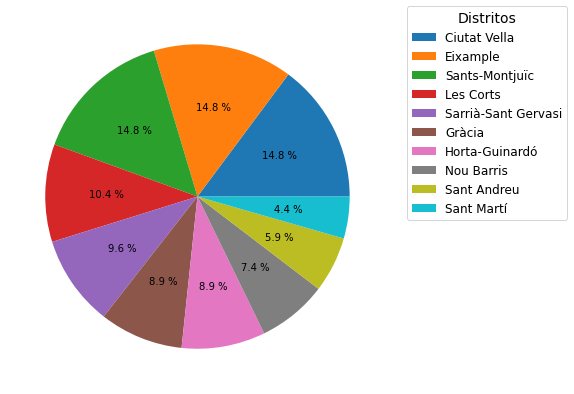

<Figure size 432x288 with 0 Axes>

In [18]:
a = df1['Nom_Districte'].value_counts() #contabilizo y grafico
nombres = df1['Nom_Districte'].unique()

plt.figure(figsize=(7,7)) #grafico y defino el tamaño
plt.pie(a, autopct='%0.1f %%')
plt.legend(labels = nombres, bbox_to_anchor=(1.05, 1),  loc= 2, borderaxespad=0.,title='Distritos', fontsize='12', title_fontsize='14')
plt.show()
plt.savefig('Distritos Porcentaje.png', bbox_inches='tight')

- En este gráfico se observa la cantidad de barrios que hay por distrito en porcentaje.

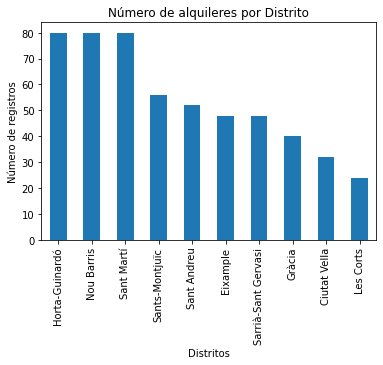

In [19]:
b = df1['Nom_Districte'].value_counts().plot.bar()
plt.title('Número de alquileres por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Número de registros')
plt.savefig('Alquileres por Distritos.png', bbox_inches='tight')

- Con el gráfico de barras se puede observar de otra forma la cantidad de barrios por distrito

In [20]:
c = df1['Nom_Barri'].value_counts()

c

el Raval                              8
el Turó de la Peira                   8
la Trinitat Nova                      8
la Prosperitat                        8
Verdun                                8
                                     ..
la Salut                              8
la Vila de Gràcia                     8
el Camp d'en Grassot i Gràcia Nova    8
el Baix Guinardó                      8
Baró de Viver                         4
Name: Nom_Barri, Length: 68, dtype: int64

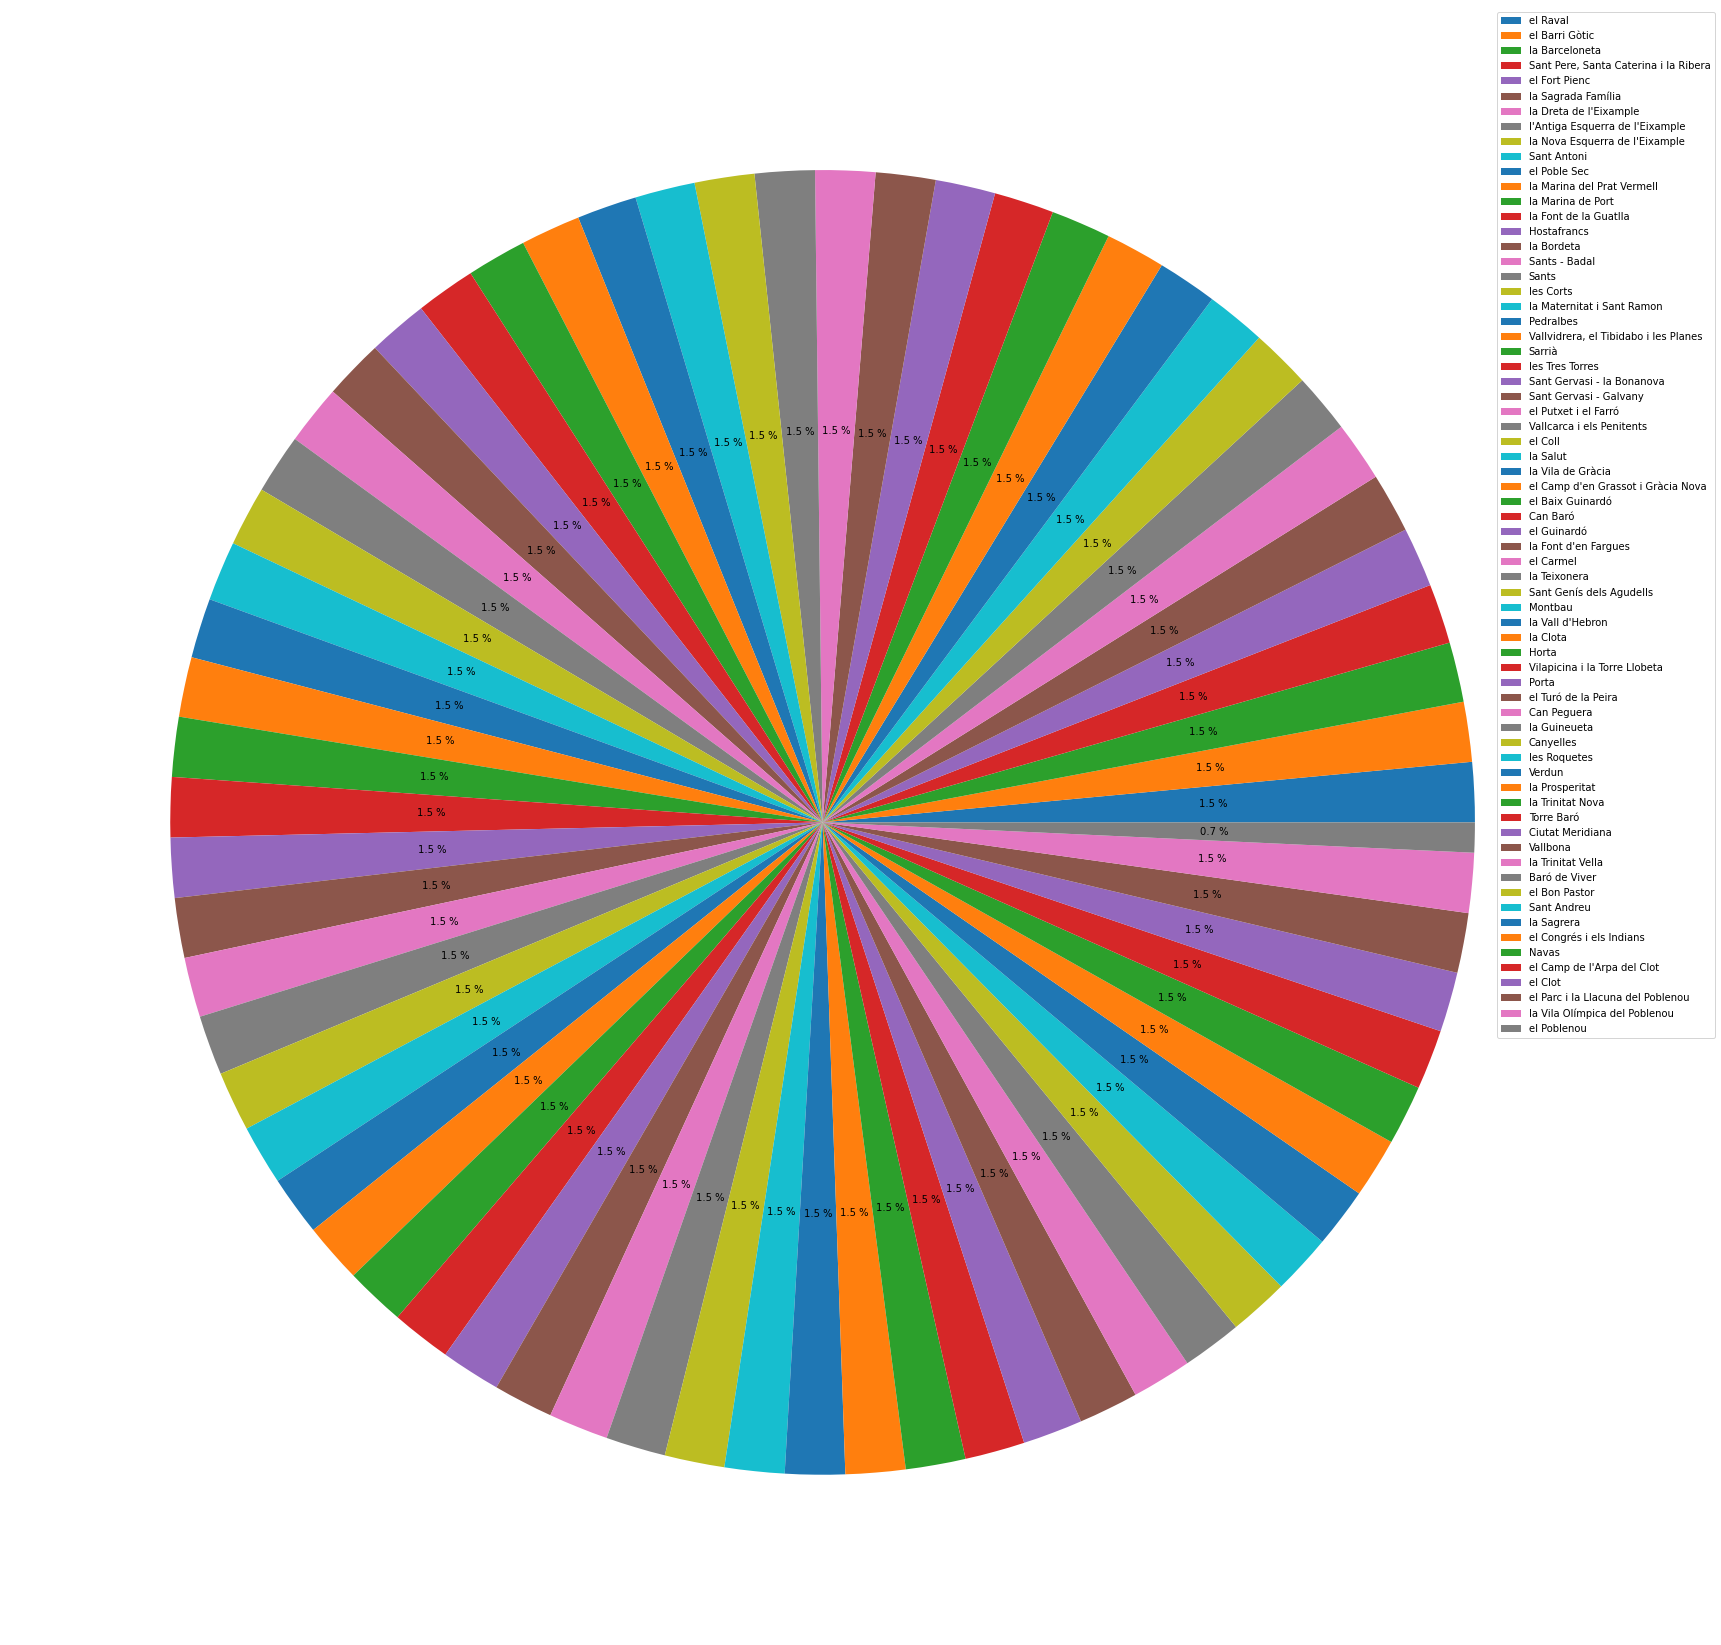

<Figure size 432x288 with 0 Axes>

In [21]:
d = df1['Nom_Barri'].value_counts() #contabilizo y grafico
nombres1 = df['Nom_Barri'].unique()

plt.figure(figsize=(30,30)) #grafico y defino el tamaño
plt.pie(d, autopct='%0.1f %%')
plt.legend(labels = nombres1, bbox_to_anchor=(1.05, 1.0), loc ='upper right')
plt.show()
plt.savefig('Alquileres por barrio.png', bbox_inches='tight')

- En este gráfico se observa el número de alquileres (viviendas en alquiler) por barrio en porcentaje. Se puede concluir que el número de registros (alquileres) coincide en cada barrio (8 por cada uno), excepto en el barrio "Baró de Viver". 

### Crea almenys una visualització per:

- Una variable numèrica (Preu)

In [22]:
e = df1['Preu'].value_counts() #contabilizo

e

13.0     13
12.7     11
12.9     10
11.8      9
13.6      9
         ..
773.5     1
818.2     1
817.7     1
667.6     1
14.9      1
Name: Preu, Length: 330, dtype: int64

In [23]:
df1['Lloguer_mitja'].value_counts()

Lloguer mitjà mensual (Euros/mes)              270
Lloguer mitjà per superfície (Euros/m2 mes)    270
Name: Lloguer_mitja, dtype: int64

- Se observa que hay registros en la columna 'Lloguer_mitja' con diferentes unidades de medida. Estos registros hacen referencia al precio del alquiler en euros/mes y euros/m2 mes.
- Para graficar el precio se utilizarán aquellos registros que coincidan con los registro de la columna "Lloguer mitjà mensual euros/mes". 

In [24]:
df1_mes = df1.loc[df1.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']

In [28]:
df1.groupby(['Nom_Districte','Lloguer_mitja'])['Preu'].mean()


Nom_Districte        Lloguer_mitja                              
Ciutat Vella         Lloguer mitjà mensual (Euros/mes)               858.925000
                     Lloguer mitjà per superfície (Euros/m2 mes)      13.775000
Eixample             Lloguer mitjà mensual (Euros/mes)              1000.545833
                     Lloguer mitjà per superfície (Euros/m2 mes)      13.300000
Gràcia               Lloguer mitjà mensual (Euros/mes)               877.265000
                     Lloguer mitjà per superfície (Euros/m2 mes)      13.380000
Horta-Guinardó       Lloguer mitjà mensual (Euros/mes)               765.007500
                     Lloguer mitjà per superfície (Euros/m2 mes)      11.987500
Les Corts            Lloguer mitjà mensual (Euros/mes)              1214.066667
                     Lloguer mitjà per superfície (Euros/m2 mes)      14.008333
Nou Barris           Lloguer mitjà mensual (Euros/mes)               664.292500
                     Lloguer mitjà per superfície (Euro

- Podemos observar que en la columna "Lloguer_mitja" se encuentran los regristos de los alquileres medios por mes y los alquileres medios por superficie.

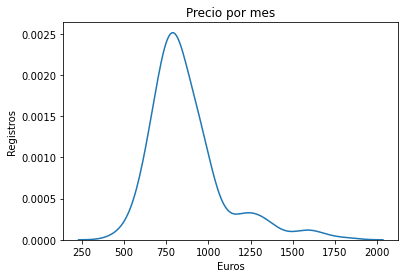

In [29]:
sns.kdeplot(df1_mes['Preu'])
plt.title('Precio por mes')
plt.xlabel('Euros')
plt.ylabel('Registros')
plt.savefig("Precio por mes.png", bbox_inches='tight')

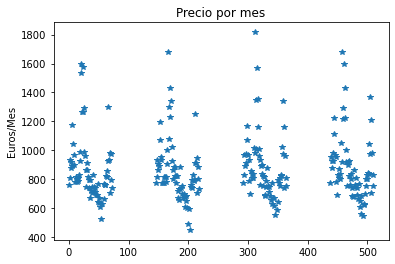

In [30]:
plt.plot(df1_mes['Preu'], '*')
plt.title('Precio por mes')
plt.ylabel('Euros/Mes')
plt.savefig('Precio por mes2.png', bbox_inches='tight')

- En estos gráficos se observan los precios de alquiler por mes. Los alquileres que tienen mayor concentración de registros se encuentran entre 600 y 800 euros. 

### Crea almenys una visualització per:

- Una variable numèrica i una categòrica (Districte i Preu)

In [31]:
dist_preu = df1_mes.groupby(['Nom_Districte'])['Preu'].mean()
dist_preu

Nom_Districte
Ciutat Vella            858.925000
Eixample               1000.545833
Gràcia                  877.265000
Horta-Guinardó          765.007500
Les Corts              1214.066667
Nou Barris              664.292500
Sant Andreu             721.196154
Sant Martí              916.450000
Sants-Montjuïc          798.932143
Sarrià-Sant Gervasi    1271.212500
Name: Preu, dtype: float64

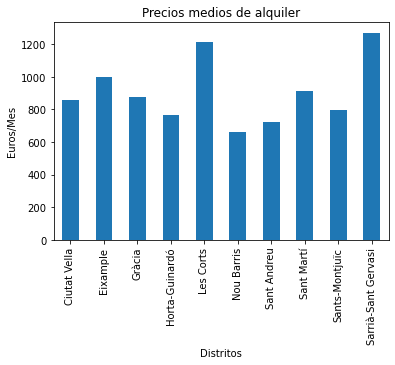

In [32]:
df1_mes.groupby(['Nom_Districte'])['Preu'].mean().plot(kind='bar')

plt.title('Precios medios de alquiler')
plt.xlabel('Distritos')
plt.ylabel('Euros/Mes')
plt.savefig('Precio medio por distrito.png', bbox_inches='tight')

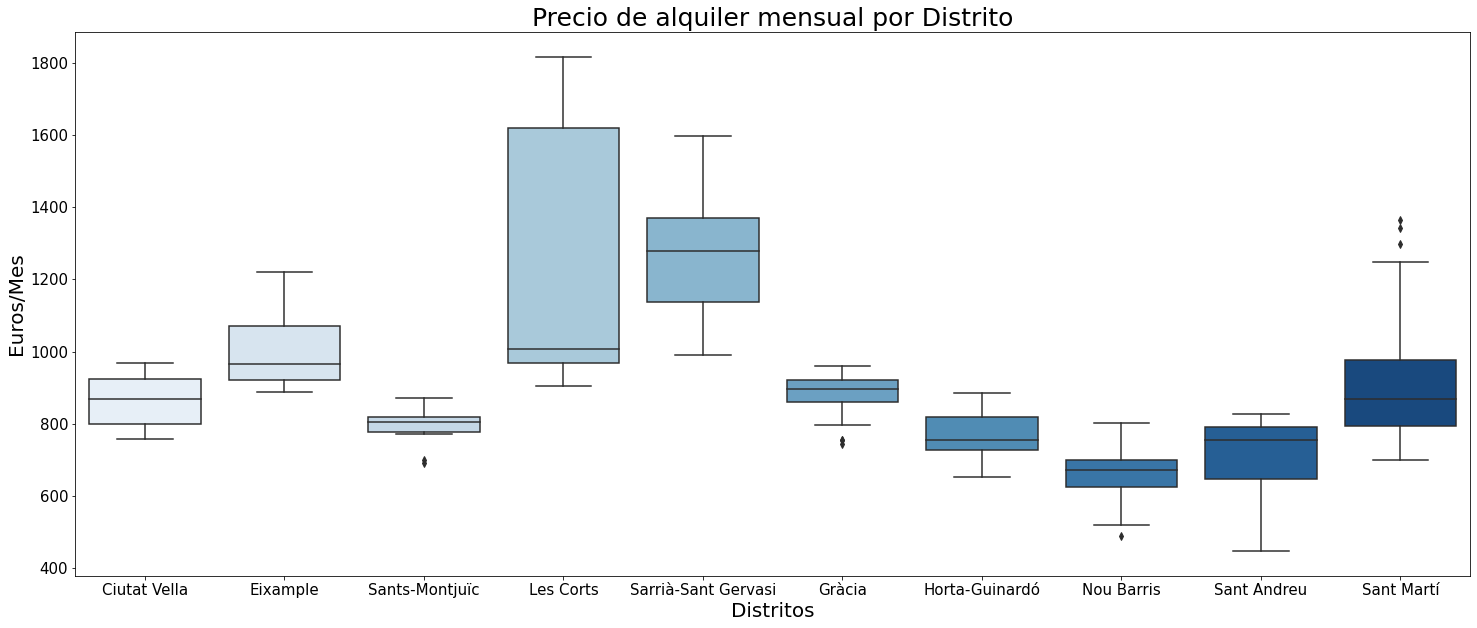

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(25,10))
g=sns.boxplot(x='Nom_Districte', y='Preu', data=df1_mes, palette= 'Blues')
g.set_title('Precio de alquiler mensual por Distrito', fontsize=25)
g.set_xlabel('Distritos',fontsize=20)
g.set_ylabel('Euros/Mes', fontsize=20)
g.tick_params(labelsize=15)
plt.show()
plt.savefig('Precio medio por distrito2.png', bbox_inches='tight')

- En este gráfico se observan los precios de alquiler promedio mensuales por distrito. Los distritos que tienen alquileres de mayor valor son los de Sarrià-Sant Gervasi y Les Corts (aunque en este último distrito tiene asimetría positiva ya que se encuentra por encima de la mediana la parte más larga de la caja. Los datos se concentran en la parte inferior de la distribución. La media suele ser mayor que la mediana. A su vez el tamaño de la caja muestra que los datos están más dispersos y por lo tanto el rango es más amplio).

In [34]:
df1_area = df1.loc[df1.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']

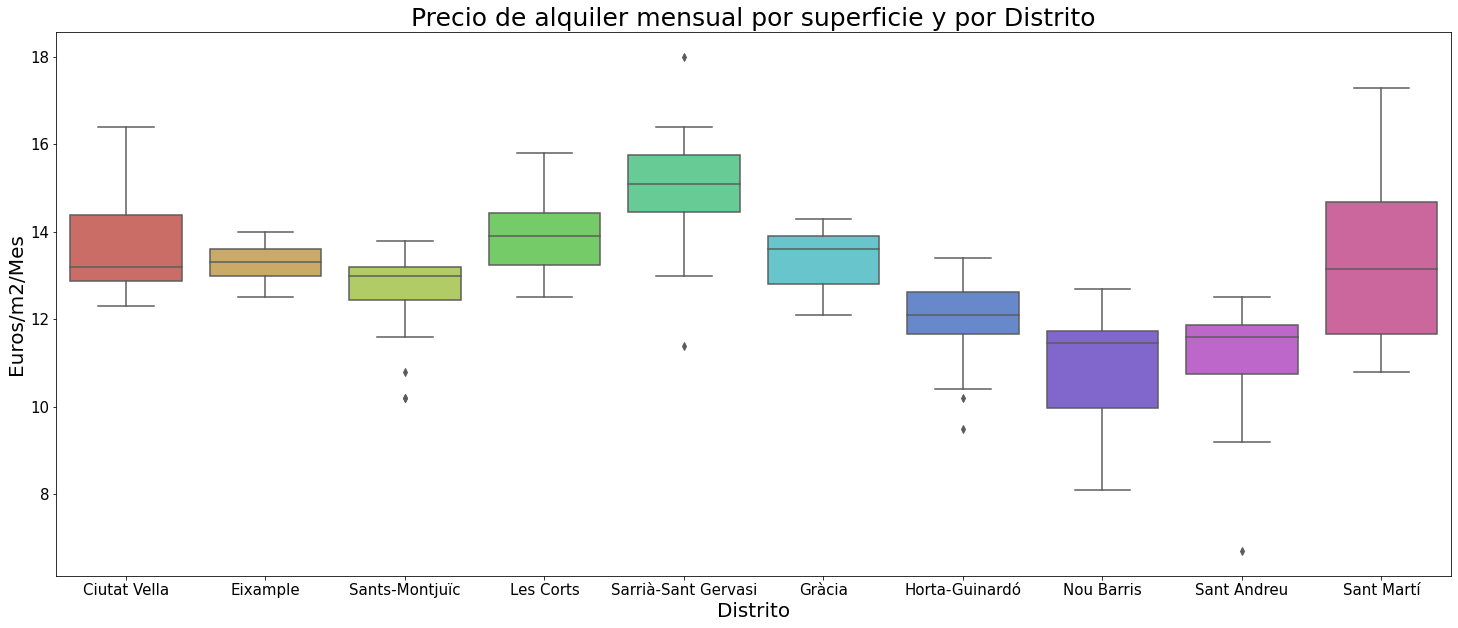

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(25,10))
h = sns.boxplot(x='Nom_Districte', y ='Preu', data=df1_area, palette ='hls')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
h.set_title('Precio de alquiler mensual por superficie y por Distrito', fontsize=25)
h.set_xlabel('Distrito', fontsize=20)
h.set_ylabel('Euros/m2/Mes', fontsize=20)
h.tick_params(labelsize=15)
plt.show()
plt.savefig('Precio por superficie y por distrito.png', bbox_inches='tight')

- En este gráfico se observa el precio de alquiler mensual por superficie(m2) y por distrito. Podemos observar que el distrito con menores valores en los alquileres por superficie es Nou Barris, y el que tiene mayores valores es Sarrià-Sant Gervasi. 

In [36]:
df1_mes_barri = df1_mes.groupby(['Nom_Barri'])['Preu'].mean()
df1_mes_barri

Nom_Barri
Baró de Viver                                    532.100
Can Baró                                         756.500
Canyelles                                        742.375
Ciutat Meridiana                                 525.700
Diagonal Mar i el Front Marítim del Poblenou    1073.725
                                                  ...   
la Vila Olímpica del Poblenou                   1313.825
la Vila de Gràcia                                901.025
les Corts                                       1014.725
les Roquetes                                     621.625
les Tres Torres                                 1542.725
Name: Preu, Length: 68, dtype: float64

### Crea almenys una visualització per:

- Dues variables numèriques (Any o Trimestre i Preu)

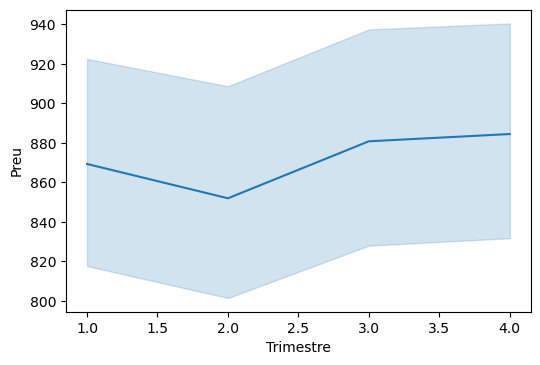

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(dpi=100)
sns.lineplot(x='Trimestre', y='Preu', data=df1_mes) 
plt.show()
plt.savefig('Precio por trimestre.png', bbox_inches='tight') 

- En este gráfico se puede observar la fluctuación en el precio de los alquileres en función de los trimestres. Observándose una caída en el precio a partir del primer trimestre, encontrandóse el punto más bajo en el segundo trimestre. Luego a partir del segundo trimestre se observa un aumento en el precio de los mismo. 

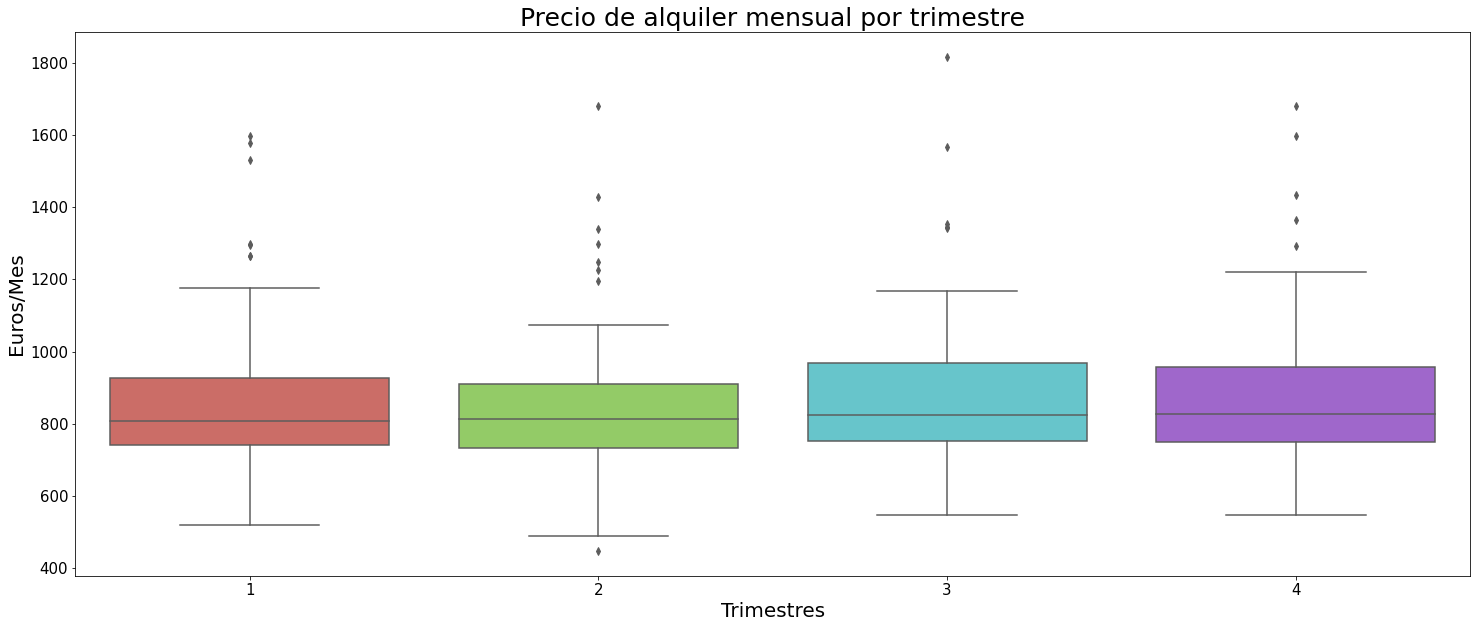

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(25,10))
i = sns.boxplot(x='Trimestre', y ='Preu', data=df1_mes, palette ='hls')
i.set_title('Precio de alquiler mensual por trimestre', fontsize=25)
i.set_xlabel('Trimestres', fontsize=20)
i.set_ylabel('Euros/Mes', fontsize=20)
i.tick_params(labelsize=15)
plt.show()
plt.savefig('Precio por trimestre2.png', bbox_inches='tight') 

- Con los boxplot no se logra observar con facilidad la fluctuación del precio en función de los trimestres.

### Crea almenys una visualització per:

- Tres variables (Barri o Districte, Trimestre i Preu)

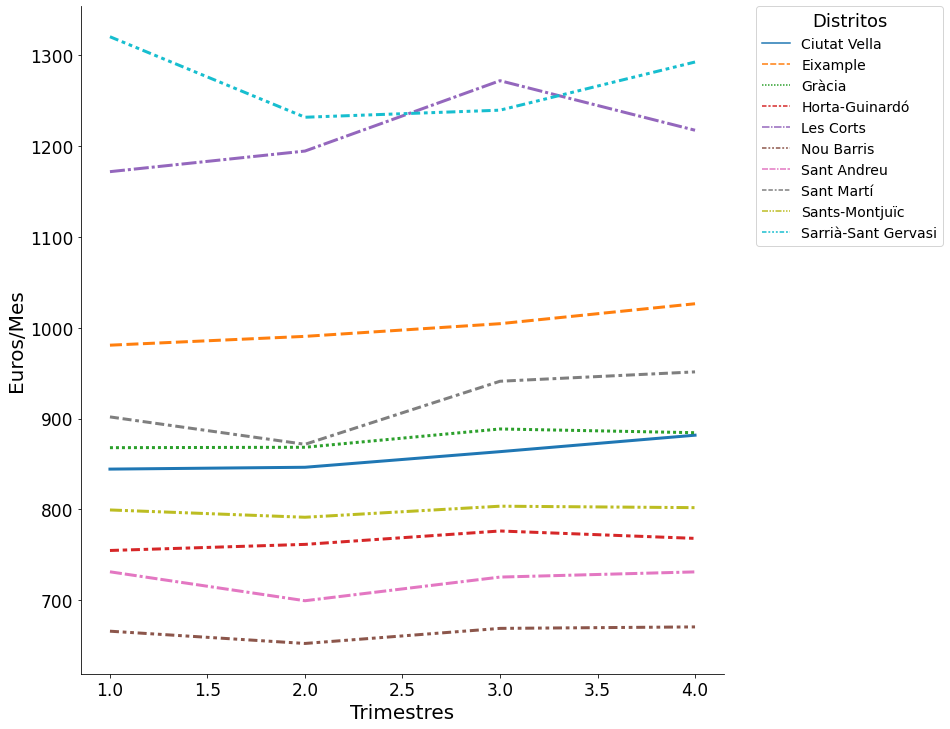

<Figure size 432x288 with 0 Axes>

In [39]:
j = df1_mes.pivot_table('Preu', 'Trimestre', 'Nom_Districte')

k =sns.relplot(data=j, kind='line',linewidth = 3, height=10)
k._legend.remove()
plt.ylabel('Euros/Mes', fontsize=20)
plt.xlabel('Trimestres', fontsize=20)
plt.tick_params(labelsize=17)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Distritos', fontsize='14', title_fontsize='18') #así la leyenda queda fuera del gráfico
plt.show()
plt.savefig('Precio por trimestre y por distritos.png', bbox_inches='tight') 


- Este gráfico muestra como va fluctuando el precio de los alquileres en función de los trimestres y los distritos. Se puede observar, en casi todos los distritos, que el mayor valor en el precio de los alquileres se da en el tercer trimestre (coincide con el verano) excepto en el distrito de Sarrià- Sant Gervasi. 

## Exercici 2

Exporta els gràfics com imatges o com HTML.



### Gráfico 1 Cantidad de Alquileres por Distrito en porcentaje

In [133]:
plt.savefig('Distritos Porcentaje.png', bbox_inches='tight') #gráfico 1

<Figure size 432x288 with 0 Axes>

### Gráfico 2 Número Alquileres por Distrito

In [134]:
plt.savefig('Alquileres por Distritos.png', bbox_inches='tight') #gráfico 2

<Figure size 432x288 with 0 Axes>

### Gráfico 3 Cantidad de Alquileres por Barrio 

In [135]:
plt.savefig('Alquileres por barrio.png', bbox_inches='tight') #gráfico 3

<Figure size 432x288 with 0 Axes>

### Gráfico 4 Precio Alquileres mensual 

In [136]:
plt.savefig('Precio por mes.png', bbox_inches='tight') #gráfico 4

<Figure size 432x288 with 0 Axes>

### Gráfico 5 Precio Alquileres mensual 2

In [137]:
plt.savefig('Precio por mes2.png', bbox_inches='tight') #grafico 5

<Figure size 432x288 with 0 Axes>

### Gráfico 6 Precio Alquileres medio por Distrito

In [138]:
plt.savefig('Precio medio por distrito.png', bbox_inches='tight') #gráfico 6

<Figure size 432x288 with 0 Axes>

### Gráfico 7 Precio Alquileres medio por Distrito 2

In [139]:
plt.savefig('Precio medio por distrito2.png', bbox_inches='tight') #gráfico 7

<Figure size 432x288 with 0 Axes>

### Gráfico 8 Precio Alquileres mensual por superficie y por Distrito

In [140]:
plt.savefig('Precio por superficie y por distrito.png', bbox_inches='tight') #gráfico 8

<Figure size 432x288 with 0 Axes>

### Gráfico 9 Precio Alquileres por Trimestre

In [141]:
plt.savefig('Precio por trimestre.png', bbox_inches='tight') #gráfico 9

<Figure size 432x288 with 0 Axes>

### Gráfico 10 Precio Alquileres por Trimestre 2

In [142]:
plt.savefig('Precio por trimestre2.png', bbox_inches='tight') #gráfico 10

<Figure size 432x288 with 0 Axes>

### Gráfico 11 Precio Alquileres medio por Trimestre y por Distrito

In [143]:
plt.savefig('Precio por trimestre y por distritos.png', bbox_inches='tight') #gráfico 11

<Figure size 432x288 with 0 Axes>

## Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.



In [144]:
df1_mes = df1_mes.Trimestre.value_counts()
df1_barri

el Raval                              4
el Turó de la Peira                   4
la Trinitat Nova                      4
la Prosperitat                        4
Verdun                                4
                                     ..
la Salut                              4
la Vila de Gràcia                     4
el Camp d'en Grassot i Gràcia Nova    4
el Baix Guinardó                      4
Baró de Viver                         2
Name: Nom_Barri, Length: 68, dtype: int64

Text(0, 0.5, 'Alquileres Máximos en Euros')

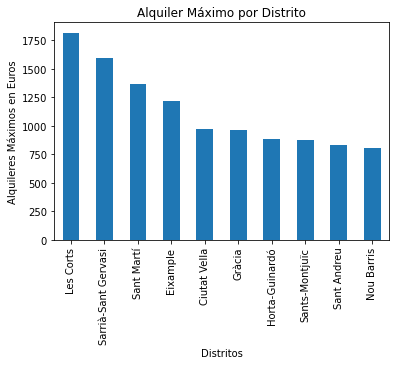

In [146]:
df_distritos = df1.groupby(['Nom_Districte']).max('Preu')

df_distritos.sort_values('Preu', ascending=False)['Preu'].plot.bar()
plt.title('Alquiler Máximo por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Alquileres Máximos en Euros')

- En este gráfico se observa el precio máximo de los alquileres por distrito, siendo el distrito de Les Corts el que tiene el mayor valor.

In [93]:
#ver python gallery